# Click Through Rate Prediction Assignment

# Submitted by - Vatsal Raicha

# Import All Libraries

In [189]:
# Import Statements
# Basic Python Stuff
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import yellowbrick as yb

#Scikit Learn
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.dummy import DummyClassifier

from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import RandomizedSearchCV,KFold,cross_val_score,train_test_split,GridSearchCV,cross_validate
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import RFE,SelectKBest, f_classif

from sklearn import metrics
from sklearn.metrics import accuracy_score,auc,balanced_accuracy_score,confusion_matrix,f1_score,log_loss,mean_squared_error,precision_score,r2_score,recall_score,roc_auc_score,roc_curve,classification_report,silhouette_score,plot_confusion_matrix

#xgboost
import xgboost as xgb

#statsmodels
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import statsmodels.formula.api as smf

#PCA
from sklearn.decomposition import PCA

#KMeans
from sklearn.cluster import KMeans

#system stuff
import os
import sys
import datetime as dt
import itertools
from datetime import timedelta
from datetime import datetime,date

import warnings
warnings.filterwarnings("ignore")

### Setting a seaborn style for the notebook

In [2]:
sns.set_style("whitegrid", {'axes.grid' : False, 'axes.edgecolor': 'lightblue'})

In [3]:
crd = pd.read_csv("data.csv")
crd.head()

,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,...,C17,C18,C19,C20,C21,month,dayofweek,day,hour,y
0,False,1005,1,856e6d3f,58a89a43,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,...,2528,0,39,100075,221,10,1,28,14,0
1,True,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,...,1934,2,39,-1,16,10,2,22,19,1
2,False,1005,0,e3c09f3a,d262cf1e,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,...,2552,3,167,100202,23,10,3,23,18,0
3,False,1002,0,0da94452,248e439f,50e219e0,ecad2386,7801e8d9,07d7df22,0fa578fd,...,2478,3,167,100074,23,10,2,22,19,0
4,True,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,...,1722,0,35,-1,79,10,1,21,8,1


## Data Preprocessing / EDA

In [4]:
crd.isna().sum()

click               0
C1                  0
banner_pos          0
site_id             0
site_domain         0
site_category       0
app_id              0
app_domain          0
app_category        0
device_id           0
device_ip           0
device_model        0
device_type         0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
C20                 0
C21                 0
month               0
dayofweek           0
day                 0
hour                0
y                   0
dtype: int64

Inference - No missing values in the data

In [5]:
crd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   click             99999 non-null  bool  
 1   C1                99999 non-null  int64 
 2   banner_pos        99999 non-null  int64 
 3   site_id           99999 non-null  object
 4   site_domain       99999 non-null  object
 5   site_category     99999 non-null  object
 6   app_id            99999 non-null  object
 7   app_domain        99999 non-null  object
 8   app_category      99999 non-null  object
 9   device_id         99999 non-null  object
 10  device_ip         99999 non-null  object
 11  device_model      99999 non-null  object
 12  device_type       99999 non-null  int64 
 13  device_conn_type  99999 non-null  int64 
 14  C14               99999 non-null  int64 
 15  C15               99999 non-null  int64 
 16  C16               99999 non-null  int64 
 17  C17         

In [6]:
crd.dtypes

click                 bool
C1                   int64
banner_pos           int64
site_id             object
site_domain         object
site_category       object
app_id              object
app_domain          object
app_category        object
device_id           object
device_ip           object
device_model        object
device_type          int64
device_conn_type     int64
C14                  int64
C15                  int64
C16                  int64
C17                  int64
C18                  int64
C19                  int64
C20                  int64
C21                  int64
month                int64
dayofweek            int64
day                  int64
hour                 int64
y                    int64
dtype: object

## Lets look if the data is balanced for output class

In [7]:
100*crd[["click","y"]].value_counts(normalize=True).reset_index()

,click,y,0
0,0,0,83.01983
1,100,100,16.98017


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


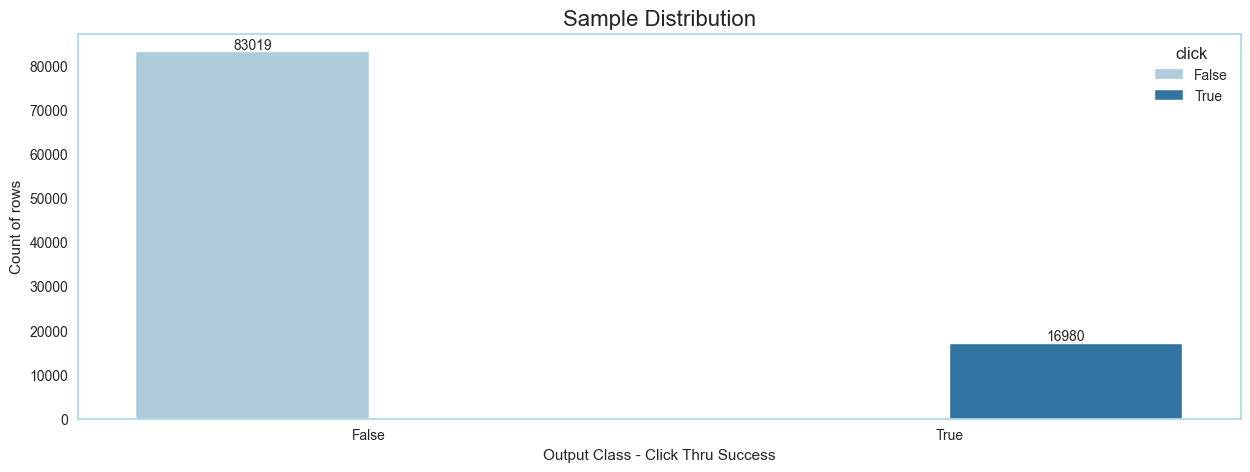

In [8]:
plt.figure(figsize=(15,5))
chart = crd[["click","y"]].value_counts().reset_index().pipe((sns.barplot,"data"),x="click",y=0,hue="click",palette="Paired")
plt.xlabel("Output Class - Click Thru Success")
plt.ylabel("Count of rows")
plt.title('Sample Distribution', fontsize=16)

for p in chart.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    chart.text(x+width/2,
               (y+height),
               '{:.0f}'.format(height),
               horizontalalignment='center',
               verticalalignment='bottom',fontsize=10)
plt.show()

Number of clicks(True) is much lesser than non-clicks(False) - 17% vs 83%

## Outlier analysis

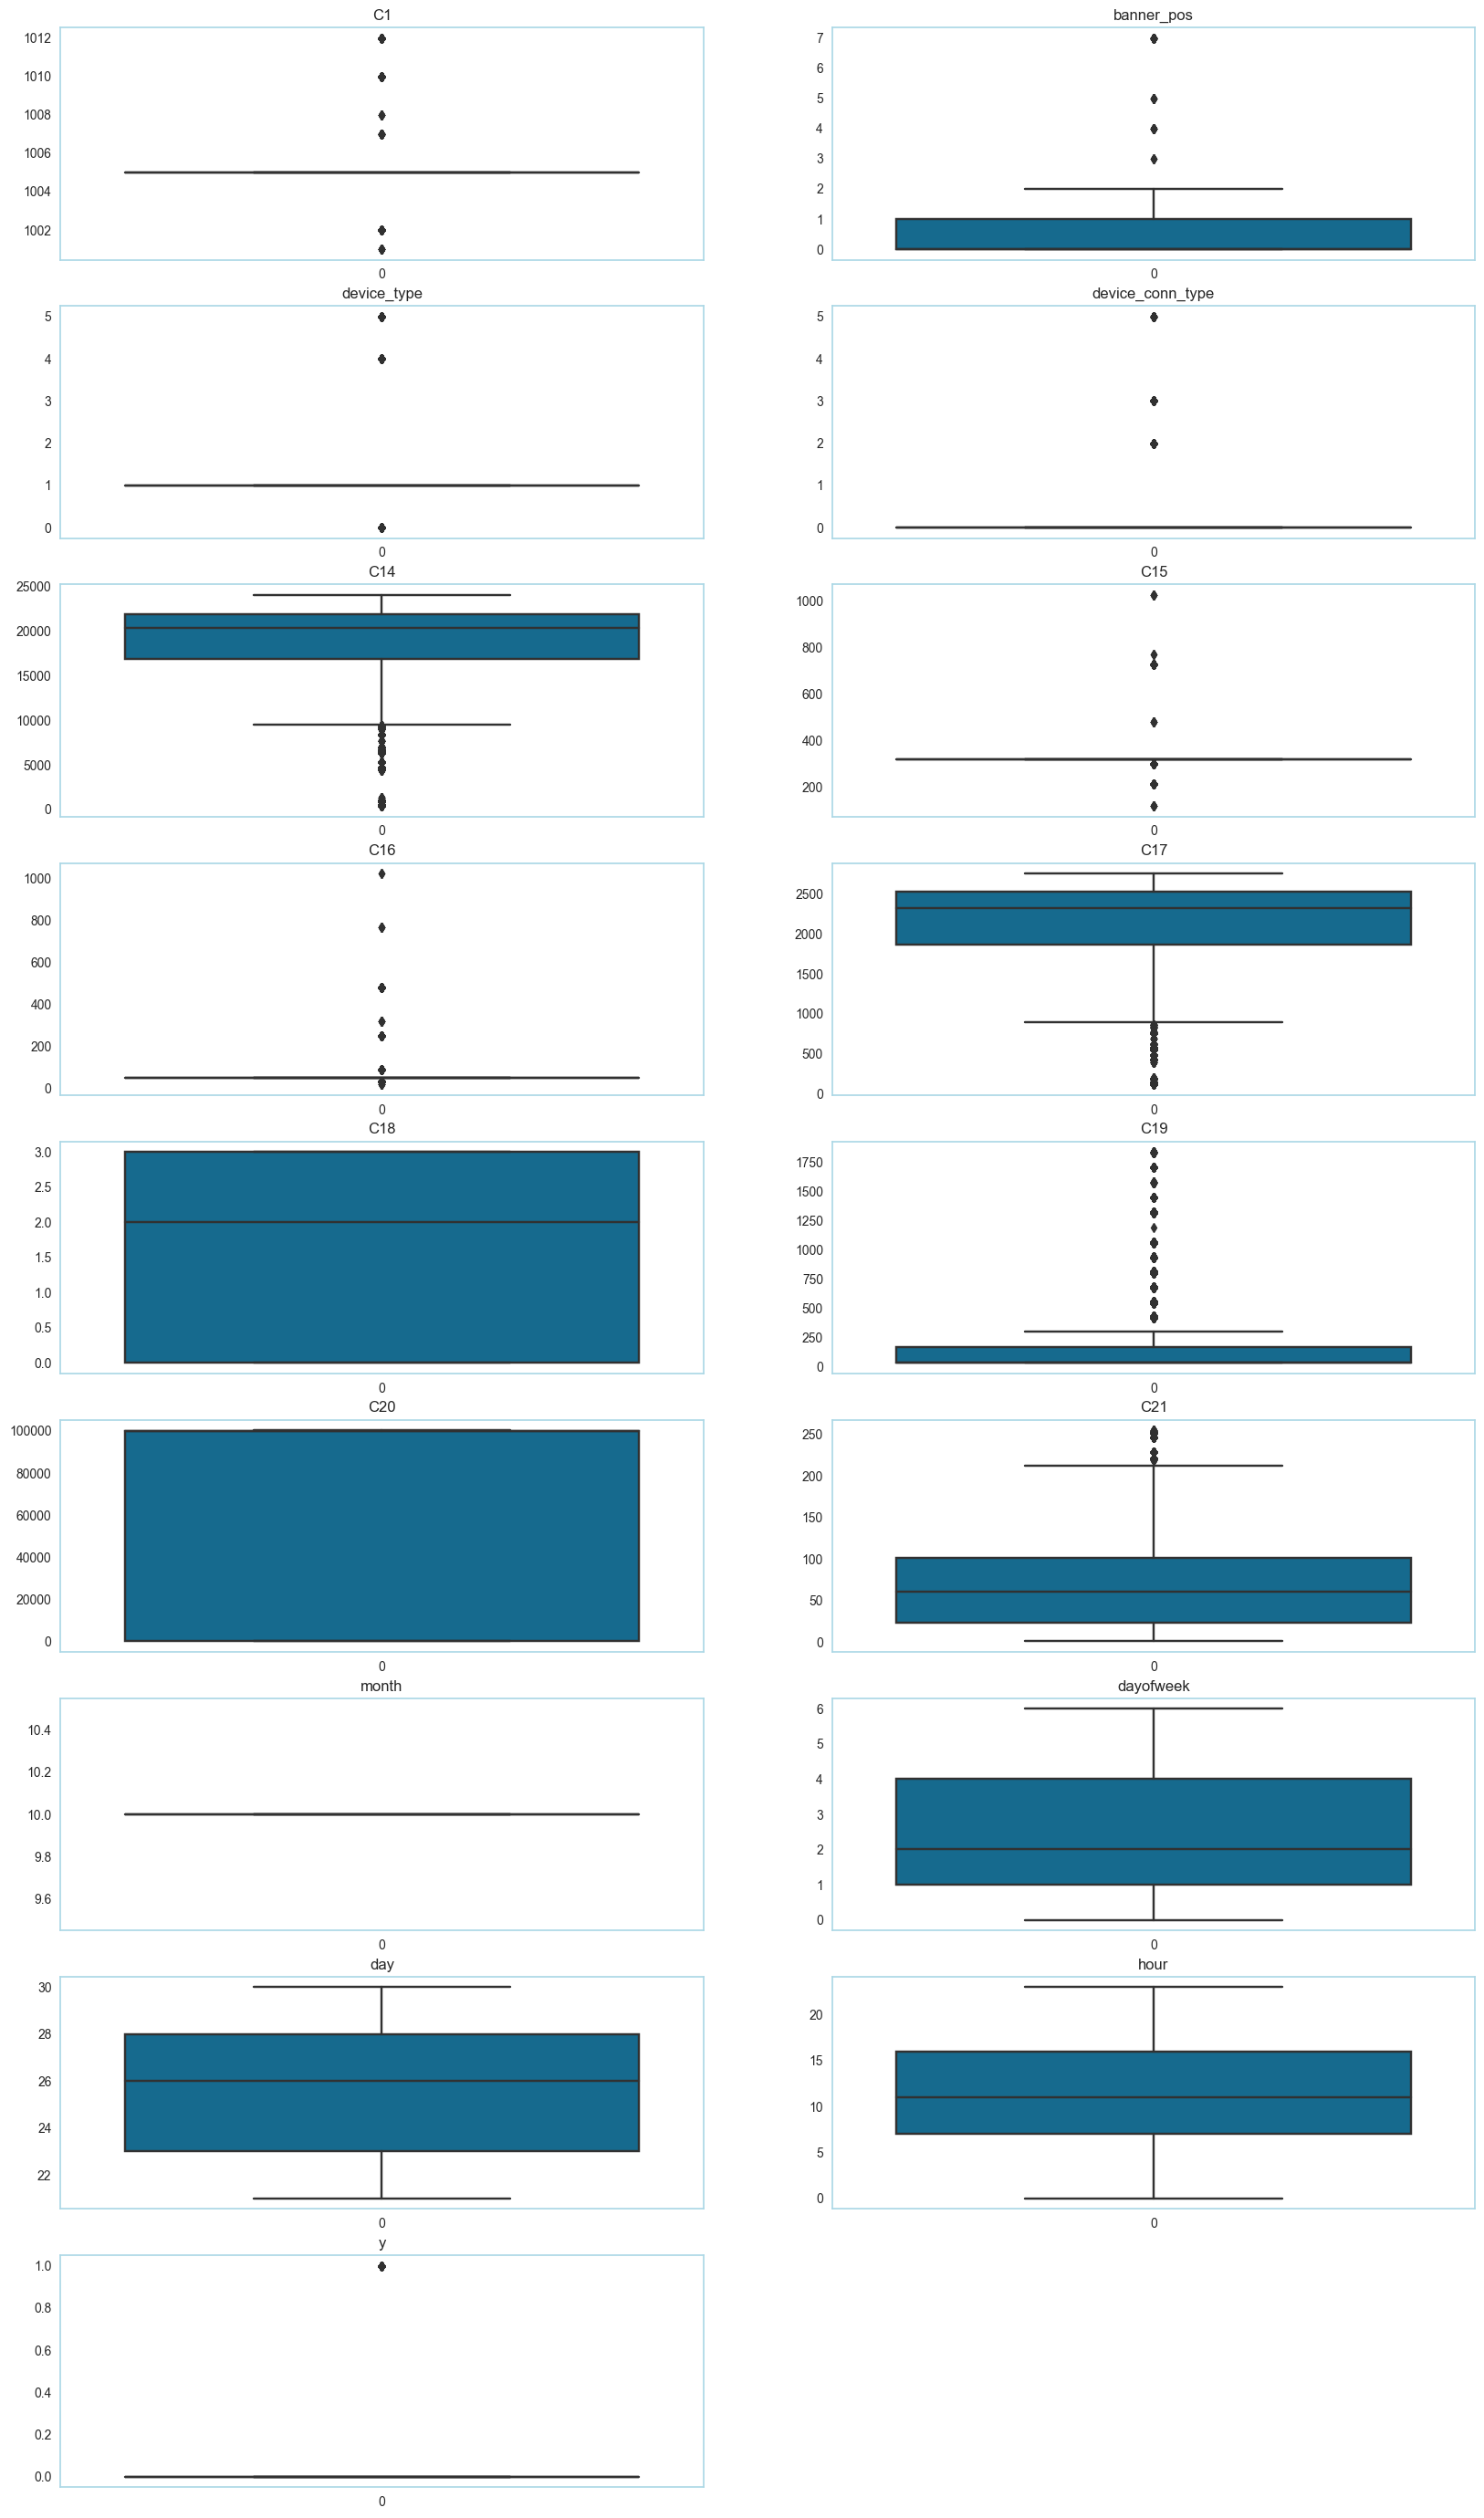

In [9]:
plt.figure(figsize=[20,35])
i = 1
num_cols = crd.select_dtypes(include = ['int']).columns.tolist()
for col in num_cols:
    plt.subplot(9,2,i)
    plt.title(col)
    sns.boxplot(data=crd[col])
    i+=1

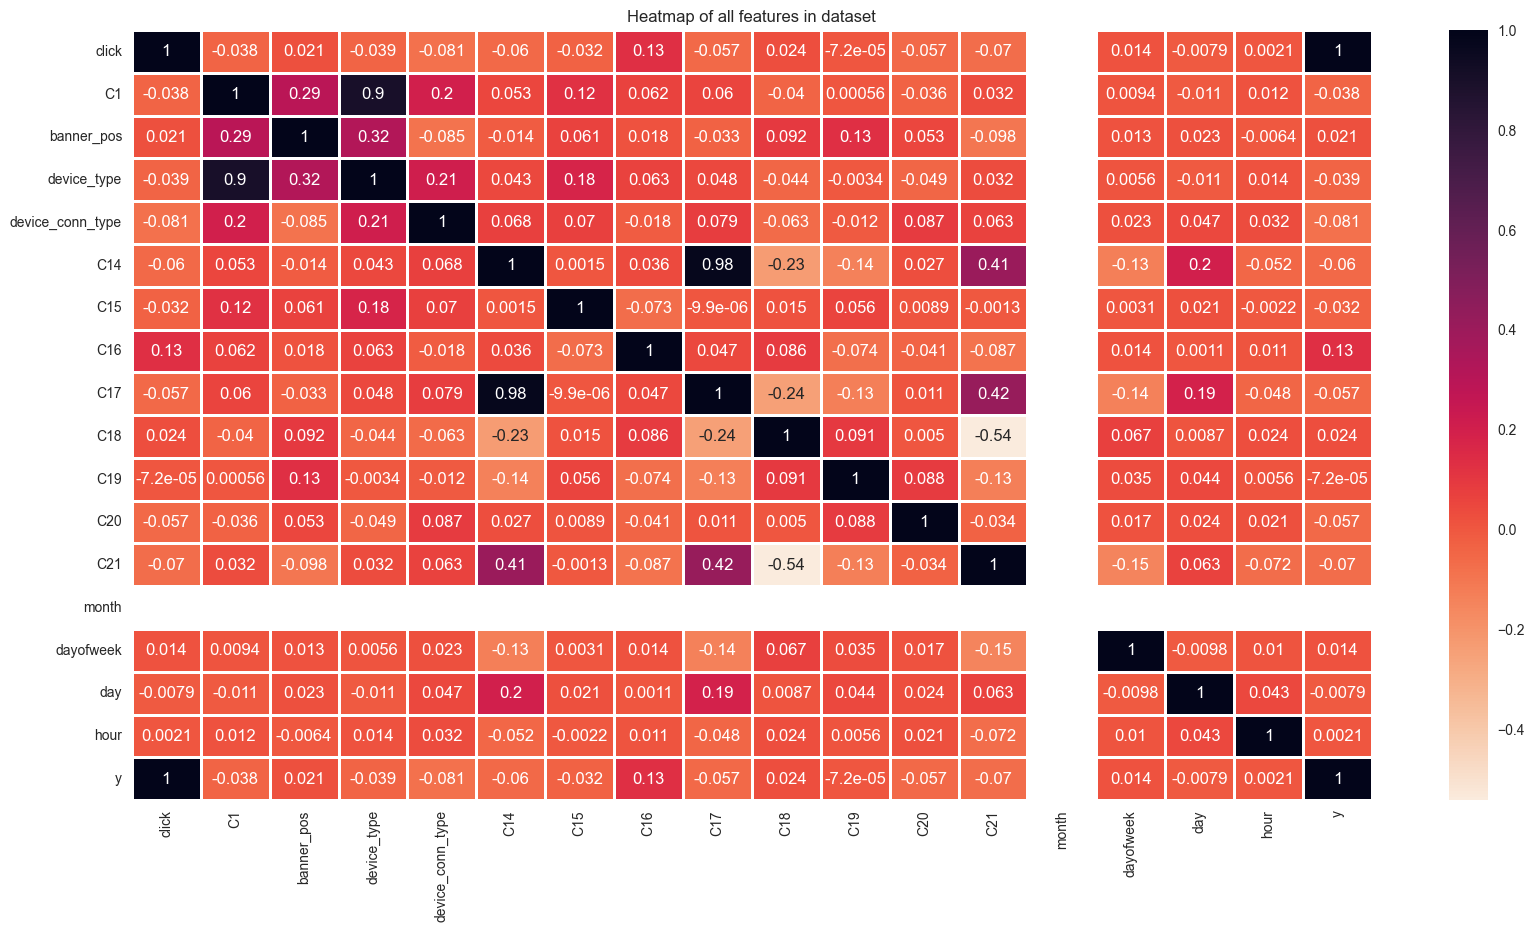

In [10]:
ad_corr = crd.corr(method = 'pearson')
fig,ax = plt.subplots(figsize = (20,10))
plt.title('Heatmap of all features in dataset')
sns.heatmap(ad_corr,
            xticklabels=ad_corr.columns,
            yticklabels=ad_corr.columns,
            cmap='rocket_r',
            annot=True,
            linewidth=1,ax=ax)
plt.show()

Writing a function to show this heatmap in a tabular form

In [11]:
import pandas as pd
def show_corr(df):
    corr = df.corr()
    so = corr.unstack().copy()

    so = pd.DataFrame(so)
    so.reset_index(inplace=True)

    so.columns = ["Feature_A","Feature_B","Correlation"]
    so["Type"] = so.Correlation.map(lambda x: "+" if x>=0 else "-")
    so.Correlation = so.Correlation.abs()
    so.sort_values(by="Correlation",ascending=False,inplace=True)

    so.reset_index(inplace=True,drop=True)

    #so = so[so.Correlation != 1]

    so["FeatureComb1"] = so.Feature_A + " - " + so.Feature_B
    so["FeatureComb2"] = so.Feature_B + " - " + so.Feature_A
    so["NextFeature"] = so["FeatureComb2"].shift(-1)
    so = so[(so.FeatureComb1 == so.NextFeature)]

    so.drop(columns=["Feature_A","Feature_B","FeatureComb2","NextFeature"],inplace=True)
    so.reset_index(inplace=True,drop=True)
    so[['FeatureA', 'FeatureB']] = so.FeatureComb1.str.split(" - ",1,expand=True)
    so.drop(columns=["FeatureComb1"],inplace=True)
    so = so[["FeatureA","FeatureB","Correlation","Type"]]
    return so

In [12]:
show_corr(crd)

,FeatureA,FeatureB,Correlation,Type
0,C14,C17,0.977095,+
1,C1,device_type,0.900151,+
2,C18,C21,0.542986,-
3,C17,C21,0.420597,+
4,C21,C14,0.407356,+
...,...,...,...,...
128,C16,day,0.001096,+
129,C19,C1,0.000559,+
130,y,C19,0.000072,-
131,C19,click,0.000072,-


C14 and C17 have high correlation
C1 and device_type have high correlation

Lets look at which columns have any relation with output variable y/click

In [14]:
(pd.concat([show_corr(crd)[show_corr(crd)["FeatureA"]=="y"],show_corr(crd)[show_corr(crd)["FeatureB"]=="y"]],axis=0)).sort_values(by="Correlation",ascending=False)

,FeatureA,FeatureB,Correlation,Type
20,C16,y,0.131336,+
33,device_conn_type,y,0.081340,-
39,C21,y,0.070121,-
51,C17,y,0.057199,-
52,y,C20,0.056929,-
70,y,device_type,0.038931,-
71,y,C1,0.037759,-
82,C15,y,0.031711,-
85,C18,y,0.024438,+
90,banner_pos,y,0.021371,+


As we can see there isnt direct linear relationship between any variable and y

In [15]:
crd[num_cols].describe()

,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,month,dayofweek,day,hour,y
count,99999.000000,99999.000000,99999.00000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.0,99999.000000,99999.000000,99999.000000,99999.000000
mean,1004.967550,0.289943,1.01639,0.329453,18857.231732,318.834548,60.278743,2114.613036,1.439904,227.234932,53292.001950,83.163542,10.0,2.592836,25.485755,11.300673,0.169802
std,1.091916,0.505707,0.53110,0.854673,4944.919482,21.510752,47.713436,607.469442,1.326824,351.472366,49952.340367,70.161076,0.0,1.723003,2.968520,5.938725,0.375460
min,1001.000000,0.000000,0.00000,0.000000,375.000000,120.000000,20.000000,112.000000,0.000000,33.000000,-1.000000,1.000000,10.0,0.000000,21.000000,0.000000,0.000000
25%,1005.000000,0.000000,1.00000,0.000000,16920.000000,320.000000,50.000000,1863.000000,0.000000,35.000000,-1.000000,23.000000,10.0,1.000000,23.000000,7.000000,0.000000
50%,1005.000000,0.000000,1.00000,0.000000,20346.000000,320.000000,50.000000,2323.000000,2.000000,39.000000,100050.000000,61.000000,10.0,2.000000,26.000000,11.000000,0.000000
75%,1005.000000,1.000000,1.00000,0.000000,21893.000000,320.000000,50.000000,2526.000000,3.000000,171.000000,100093.000000,101.000000,10.0,4.000000,28.000000,16.000000,0.000000
max,1012.000000,7.000000,5.00000,5.000000,24043.000000,1024.000000,1024.000000,2757.000000,3.000000,1839.000000,100248.000000,255.000000,10.0,6.000000,30.000000,23.000000,1.000000


### Writing a function to generate some statistics

In [16]:
def func_stats(crd):
    col_stats = []
    for x in crd.columns:
        col_stats.append([x,
                          crd[x].dtype,
                          crd[x].unique().size,
                          round(100*crd[x].unique().size/crd[x].size,2),
                          ((100*crd[x].value_counts()/crd[x].size).sort_values(ascending=False)).index[0],
                          ((100*crd[x].value_counts()/crd[x].size).sort_values(ascending=False)).iloc[0]])

    df_stats = pd.DataFrame(np.array(col_stats),columns=["Column",
                                                         "Type",
                                                         "NumOfUniqueValues",
                                                         "PercentUnqOfTotal",
                                                         "MostAppearing","MostAppearing%"]).sort_values(by="PercentUnqOfTotal",ascending=False)
    return df_stats.sort_values(by="MostAppearing%",ascending=False)

In [17]:
func_stats(crd)

,Column,Type,NumOfUniqueValues,PercentUnqOfTotal,MostAppearing,MostAppearing%
22,month,int64,1,0.0,10,100.0
16,C16,int64,9,0.01,50,94.209942
15,C15,int64,8,0.01,320,93.136931
12,device_type,int64,4,0.0,1,92.239922
1,C1,int64,7,0.01,1005,91.862919
13,device_conn_type,int64,4,0.0,0,86.413864
26,y,int64,2,0.0,0,83.01983
0,click,bool,2,0.0,False,83.01983
9,device_id,object,16801,16.8,a99f214a,82.579826
2,banner_pos,int64,7,0.01,0,71.778718


## Map Columns Names with Prettier names for use with plots

In [18]:
col_dict1={
    "hour":["Hour of the Day"],"day":["Day"],
    "dayofweek":["Day of the Week"],"month":["Month"],
    "banner_pos":["Banner Position"],
    "site_id": ["Site ID"],"site_domain": ["Site Domain"],"site_category":["Site Category"],
    "app_id": ["App ID"],"app_domain": ["App Domain"],"app_category":["App Category"],
    "device_id": ["Device ID"],"device_ip": ["Device IP"],"device_model": ["Device Model"],
    "device_type":["Device Type"],"device_conn_type":["Device Connection Type"],
    "C1":["C1"],"C14":["C14"],"C15":["C15"],"C16":["C16"],"C17":["C17"],"C18":["C18"],
    "C19":["C19"],"C20":["C20"],"C21":["C21"]
    }

## Plot hour,day, day of the week and month against the target variable click/y (True/False 1/0) and see the count of data the categories within represent

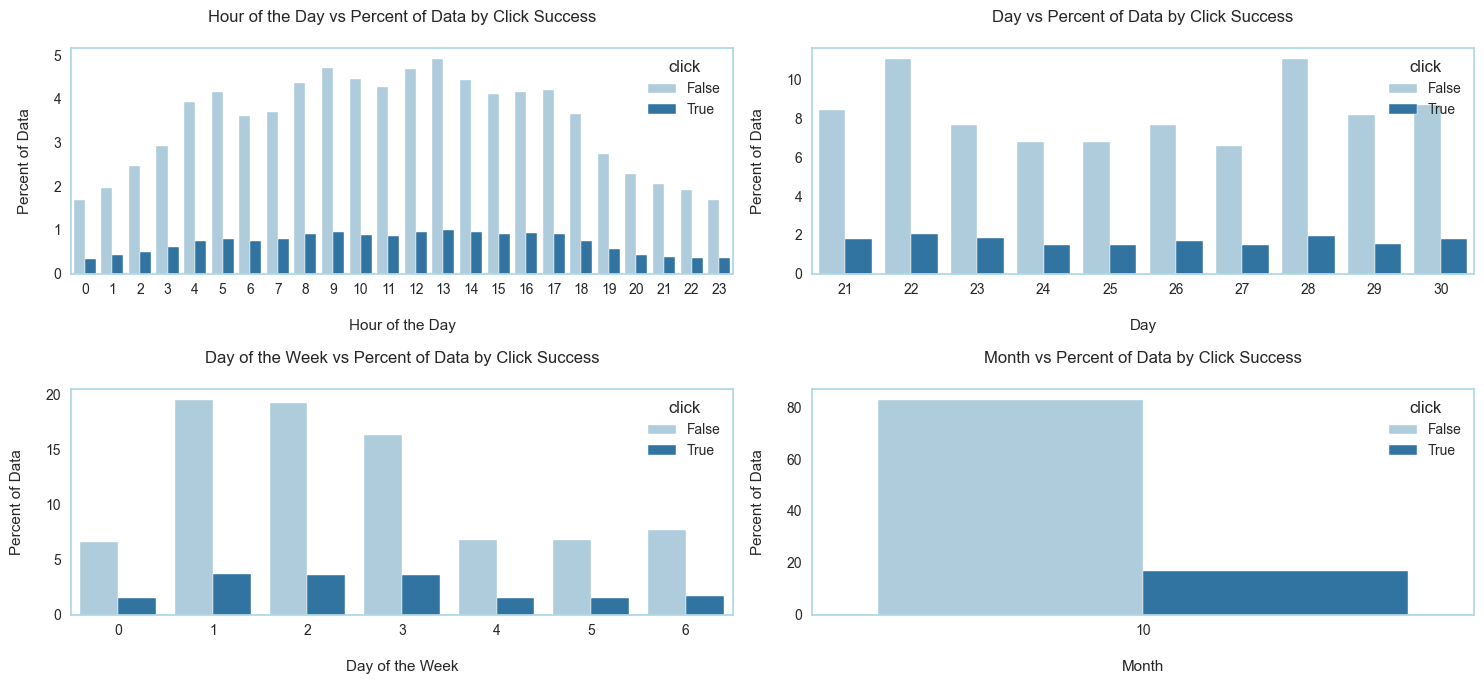

In [62]:
#hour
res = list(range(0,len(col_dict1.keys())))
sns.set_style("whitegrid", {'axes.grid' : False, 'axes.edgecolor': 'lightblue'})
fig,axs = plt.subplots(2,2,figsize=(15,7))
counter=0
x = list(col_dict1.keys())[counter]
df_chart = (round(100*crd[[x,"click"]].value_counts(normalize=True),2).reset_index()).sort_values(by=[x,"click"])
res[counter] = sns.barplot(df_chart,x=x,y=0,hue="click",palette="Paired",ax=axs[0,0])
res[counter].set_xlabel("\n"+col_dict1[x][0])
res[counter].set_ylabel("Percent of Data\n")
res[counter].set_title(col_dict1[x][0]+" vs Percent of Data by Click Success\n")
plt.setp(res[counter].xaxis.get_majorticklabels(),fontsize=10)

#day
counter=1
x = list(col_dict1.keys())[counter]
df_chart = (round(100*crd[[x,"click"]].value_counts(normalize=True),2).reset_index()).sort_values(by=[x,"click"])
res[counter] = sns.barplot(df_chart,x=x,y=0,hue="click",palette="Paired",ax=axs[0,1])
res[counter].set_xlabel("\n"+col_dict1[x][0])
res[counter].set_ylabel("Percent of Data\n")
res[counter].set_title(col_dict1[x][0]+" vs Percent of Data by Click Success\n")
sns.move_legend(res[counter],"upper right")

plt.setp(res[counter].xaxis.get_majorticklabels(),fontsize=10)

#day of the week
counter=2
x = list(col_dict1.keys())[counter]
df_chart = (round(100*crd[[x,"click"]].value_counts(normalize=True),2).reset_index()).sort_values(by=[x,"click"])
res[counter] = sns.barplot(df_chart,x=x,y=0,hue="click",palette="Paired",ax=axs[1,0])
res[counter].set_xlabel("\n"+col_dict1[x][0])
res[counter].set_ylabel("Percent of Data\n")
res[counter].set_title(col_dict1[x][0]+" vs Percent of Data by Click Success\n")

plt.setp(res[counter].xaxis.get_majorticklabels(),fontsize=10)

#Month
counter=3
x = list(col_dict1.keys())[counter]
df_chart = (round(100*crd[[x,"click"]].value_counts(normalize=True),2).reset_index()).sort_values(by=[x,"click"])
res[counter] = sns.barplot(df_chart,x=x,y=0,hue="click",palette="Paired",ax=axs[1,1])
res[counter].set_xlabel("\n"+col_dict1[x][0])
res[counter].set_ylabel("Percent of Data\n")
res[counter].set_title(col_dict1[x][0]+" vs Percent of Data by Click Success\n")

plt.setp(res[counter].xaxis.get_majorticklabels(),fontsize=10)

plt.tight_layout()
plt.savefig("01 - Hour-Day-Week-Month Analysis.jpeg",dpi=400, bbox_inches='tight')
plt.show()

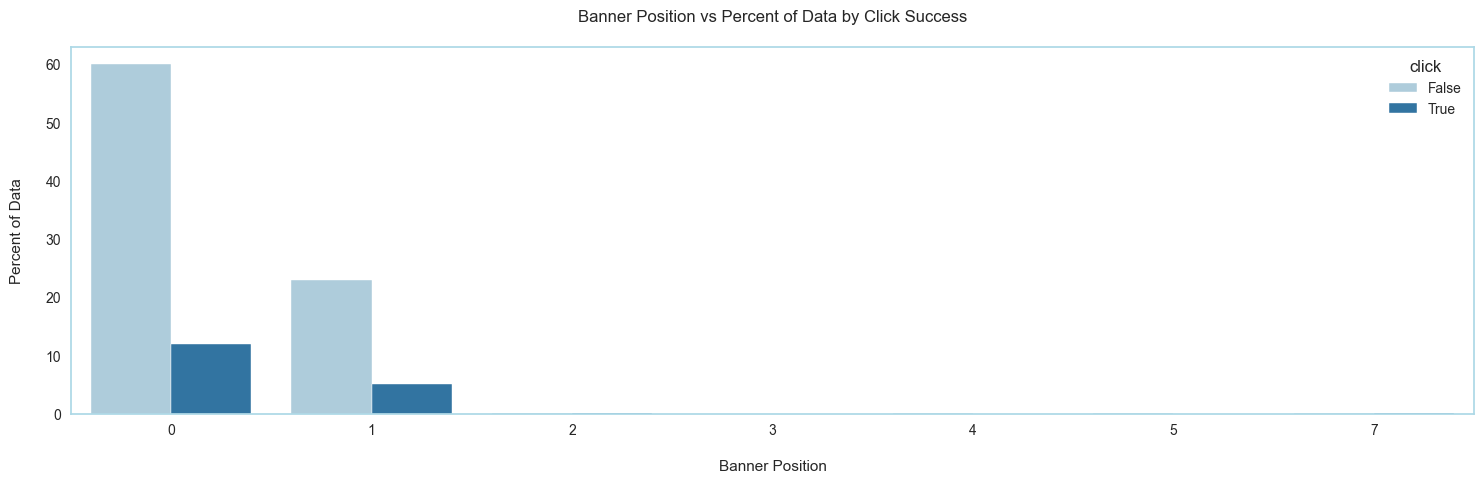

In [20]:
# Banner Position
counter=4
x = list(col_dict1.keys())[counter]
plt.figure(figsize=(15,5))
df_chart = (round(100*crd[[x,"click"]].value_counts(normalize=True),2).reset_index()).sort_values(by=[x,"click"])
res[counter] = sns.barplot(df_chart,x=x,y=0,hue="click",palette="Paired")
res[counter].set_xlabel("\n"+col_dict1[x][0])
res[counter].set_ylabel("Percent of Data\n")
res[counter].set_title(col_dict1[x][0]+" vs Percent of Data by Click Success\n")

plt.setp(res[counter].xaxis.get_majorticklabels(),fontsize=10)
plt.tight_layout()
plt.savefig("02 - Banner Position Analysis.jpeg",dpi=400, bbox_inches='tight')
plt.show()

In [57]:
#site_id, site_category, site_id
display(func_stats(crd)[func_stats(crd)["Column"].isin(["site_id","site_domain","site_category"])])

,Column,Type,NumOfUniqueValues,PercentUnqOfTotal,MostAppearing,MostAppearing%
5,site_category,object,19,0.02,50e219e0,40.839408
4,site_domain,object,1331,1.33,c4e18dd6,37.362374
3,site_id,object,1485,1.49,85f751fd,36.02236


We won't be able to plot a chart for site_id, as there are too many unique values here. The top most appearing site id represents 36% of data.
Same is the case with site_domain, too many unique values. the top most appearing site_domain represents around 37% of data


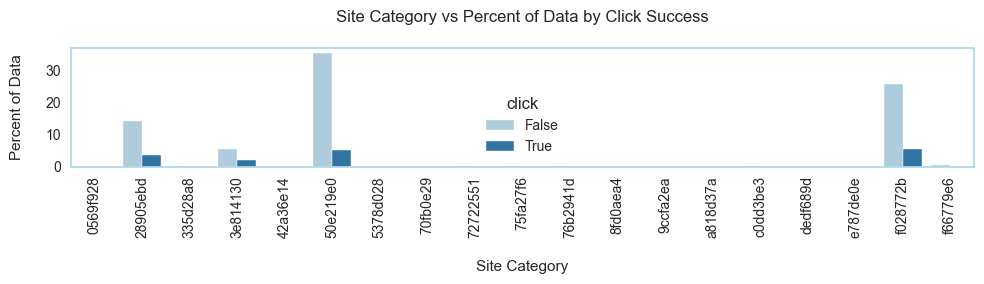

In [63]:
#Site Category
counter=7
x = list(col_dict1.keys())[counter]
plt.figure(figsize=(10,3))
df_chart = (round(100*crd[[x,"click"]].value_counts(normalize=True),2).reset_index()).sort_values(by=[x,"click"])
res[counter] = sns.barplot(df_chart,x=x,y=0,hue="click",palette="Paired")
res[counter].set_xlabel("\n"+col_dict1[x][0])
res[counter].set_ylabel("Percent of Data\n")
res[counter].set_title(col_dict1[x][0]+" vs Percent of Data by Click Success\n")

plt.setp(res[counter].xaxis.get_majorticklabels(),fontsize=10,rotation=90)
plt.tight_layout()
plt.savefig("03 - Site Category Analysis.jpeg",dpi=400, bbox_inches='tight')
plt.show()

In [59]:
#App Id, App Domain, App Category
display(func_stats(crd)[func_stats(crd)["Column"].isin(["app_id","app_domain","app_category"])])

,Column,Type,NumOfUniqueValues,PercentUnqOfTotal,MostAppearing,MostAppearing%
7,app_domain,object,96,0.1,7801e8d9,67.464675
8,app_category,object,21,0.02,07d7df22,64.769648
6,app_id,object,1354,1.35,ecad2386,63.97764


app_id also has too many values, with the top most appearing app id representing 64% of the data
app_domain also has high unique values (96), with the top most app domain representing around 67% of the data. We will quickly plot a small chart for this.

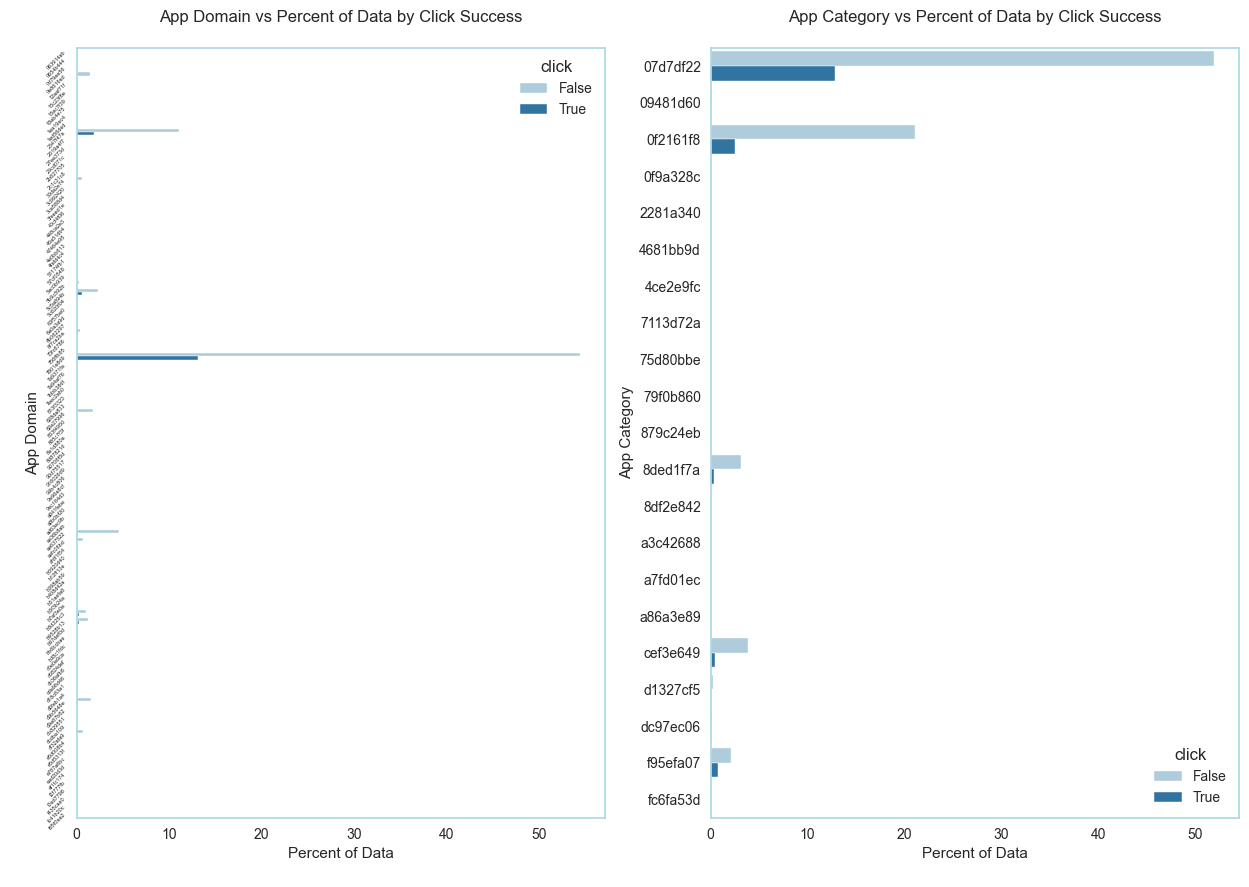

In [47]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,10))

#App Domain
counter=9
x = list(col_dict1.keys())[counter]
#plt.figure(figsize=(15,10))
df_chart = (round(100*crd[[x,"click"]].value_counts(normalize=True),2).reset_index()).sort_values(by=[x,"click"])
res[counter] = sns.barplot(df_chart,x=0,y=x,hue="click",palette="Paired",ax=ax1)
res[counter].set_ylabel("\n"+col_dict1[x][0])
res[counter].set_xlabel("Percent of Data\n")
res[counter].set_title(col_dict1[x][0]+" vs Percent of Data by Click Success\n")
plt.setp(res[counter].yaxis.get_majorticklabels(),fontsize=4,rotation=45)
plt.setp(res[counter].xaxis.get_majorticklabels(),fontsize=10)
#plt.tight_layout()
#plt.show()

#App Category
counter=10
x = list(col_dict1.keys())[counter]
#plt.figure(figsize=(15,10))
df_chart = (round(100*crd[[x,"click"]].value_counts(normalize=True),2).reset_index()).sort_values(by=[x,"click"])
res[counter] = sns.barplot(df_chart,x=0,y=x,hue="click",palette="Paired",ax=ax2)
res[counter].set_ylabel("\n"+col_dict1[x][0])
res[counter].set_xlabel("Percent of Data\n")
res[counter].set_title(col_dict1[x][0]+" vs Percent of Data by Click Success\n")

plt.setp(res[counter].xaxis.get_majorticklabels(),fontsize=10)

#plt.tight_layout()
plt.savefig("04 - App Domain and App Category Analysis.jpeg",dpi=400, bbox_inches='tight')
plt.show()


app_domain also has high unique values (96), with the top most app domain representing around 67% of the data.
From the chart above you can see that mostly 5 major app categories account for almost all of the data

In [64]:
#Device ID, Device IP, Device Model
func_stats(crd)[func_stats(crd)["Column"].isin(["device_id","device_ip","device_model"])]

,Column,Type,NumOfUniqueValues,PercentUnqOfTotal,MostAppearing,MostAppearing%
9,device_id,object,16801,16.8,a99f214a,82.579826
11,device_model,object,3145,3.15,8a4875bd,6.04106
10,device_ip,object,78013,78.01,6b9769f2,0.521005


#device_id - Too many unique device ids, with most of the data (82.5%) being represented by 1 device id

#device_ip - I doubt this column has anything to contribute to the data as there are so many unique values. of 99,999 rows, there are 78,013 unqiue values for device_ip.
I might decide to drop this column

#device_model - Too many unique values of device model. Interesting thing is that the 3145 unique device_models, none of the models seem to be representing the data at all. The top most appearing device model represents only 6% of data. I might get rid of this column as well.



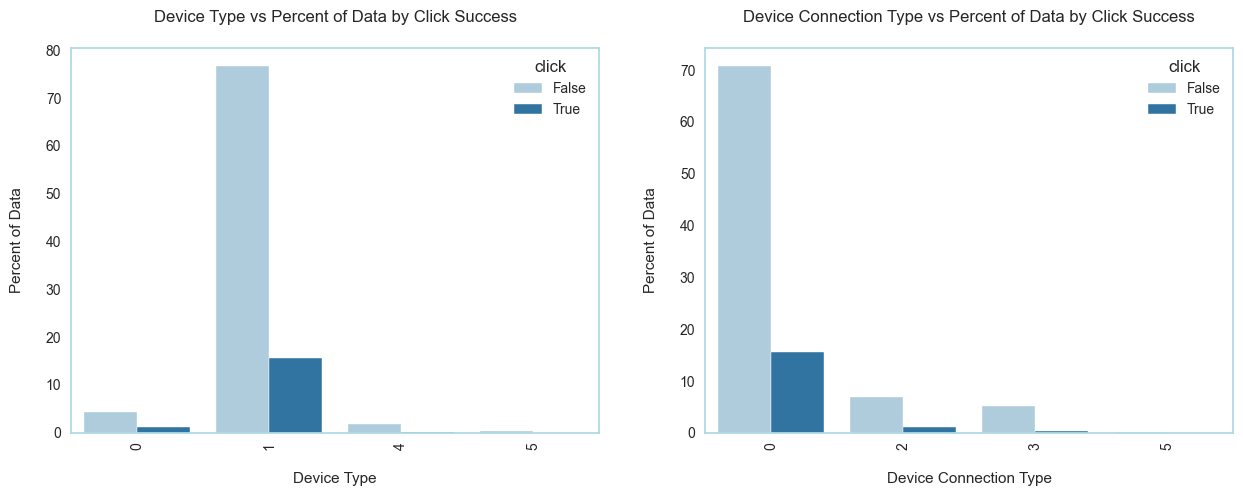

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

In [69]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
#Device Type
counter=14
x = list(col_dict1.keys())[counter]
plt.figure(figsize=(15,5))
df_chart = (round(100*crd[[x,"click"]].value_counts(normalize=True),2).reset_index()).sort_values(by=[x,"click"])
res[counter] = sns.barplot(df_chart,x=x,y=0,hue="click",palette="Paired",ax=ax1)
res[counter].set_xlabel("\n"+col_dict1[x][0])
res[counter].set_ylabel("Percent of Data\n")
res[counter].set_title(col_dict1[x][0]+" vs Percent of Data by Click Success\n")

plt.setp(res[counter].xaxis.get_majorticklabels(),fontsize=10,rotation=90)

#Device Connection Type
counter=15
x = list(col_dict1.keys())[counter]
plt.figure(figsize=(15,5))
df_chart = (round(100*crd[[x,"click"]].value_counts(normalize=True),2).reset_index()).sort_values(by=[x,"click"])
res[counter] = sns.barplot(df_chart,x=x,y=0,hue="click",palette="Paired",ax=ax2)
res[counter].set_xlabel("\n"+col_dict1[x][0])
res[counter].set_ylabel("Percent of Data\n")
res[counter].set_title(col_dict1[x][0]+" vs Percent of Data by Click Success\n")

plt.setp(res[counter].xaxis.get_majorticklabels(),fontsize=10,rotation=90)

plt.tight_layout()
plt.savefig("05 - Device Type and Device Connection Type Analysis.jpeg",dpi=400, bbox_inches='tight')
plt.show()

In [70]:
#"C" Columns
func_stats(crd)[func_stats(crd)["Column"].isin(["C1","C14","C15","C16","C17","C18","C19","C20","C21"])].sort_values(by="Column",ascending=True)

,Column,Type,NumOfUniqueValues,PercentUnqOfTotal,MostAppearing,MostAppearing%
1,C1,int64,7,0.01,1005,91.862919
14,C14,int64,1722,1.72,4687,2.306023
15,C15,int64,8,0.01,320,93.136931
16,C16,int64,9,0.01,50,94.209942
17,C17,int64,399,0.4,1722,10.99111
18,C18,int64,4,0.0,0,41.659417
19,C19,int64,64,0.06,35,29.935299
20,C20,int64,154,0.15,-1,46.767468
21,C21,int64,60,0.06,23,22.096221


C1, C15, C16 seem to have fewer categories and their top most appearing category represents over 90% of data. We will plot data for these columns.
C18 has only 4 categories and the top most representing 41% of data. This column may have an even spread. We will plot the data for this.
C14, C17, C19, C20 and C21 All seem to have high number of unique values and we wont be able to properly plot them.
C14 data is very spread and all categories represent very little data
C17 top most category represents only 10% of data, so again a bit spread out
C19, C20 and C21 has fewer unique values compared to other "C" columns, with their top most category representing between 20-45% of data.

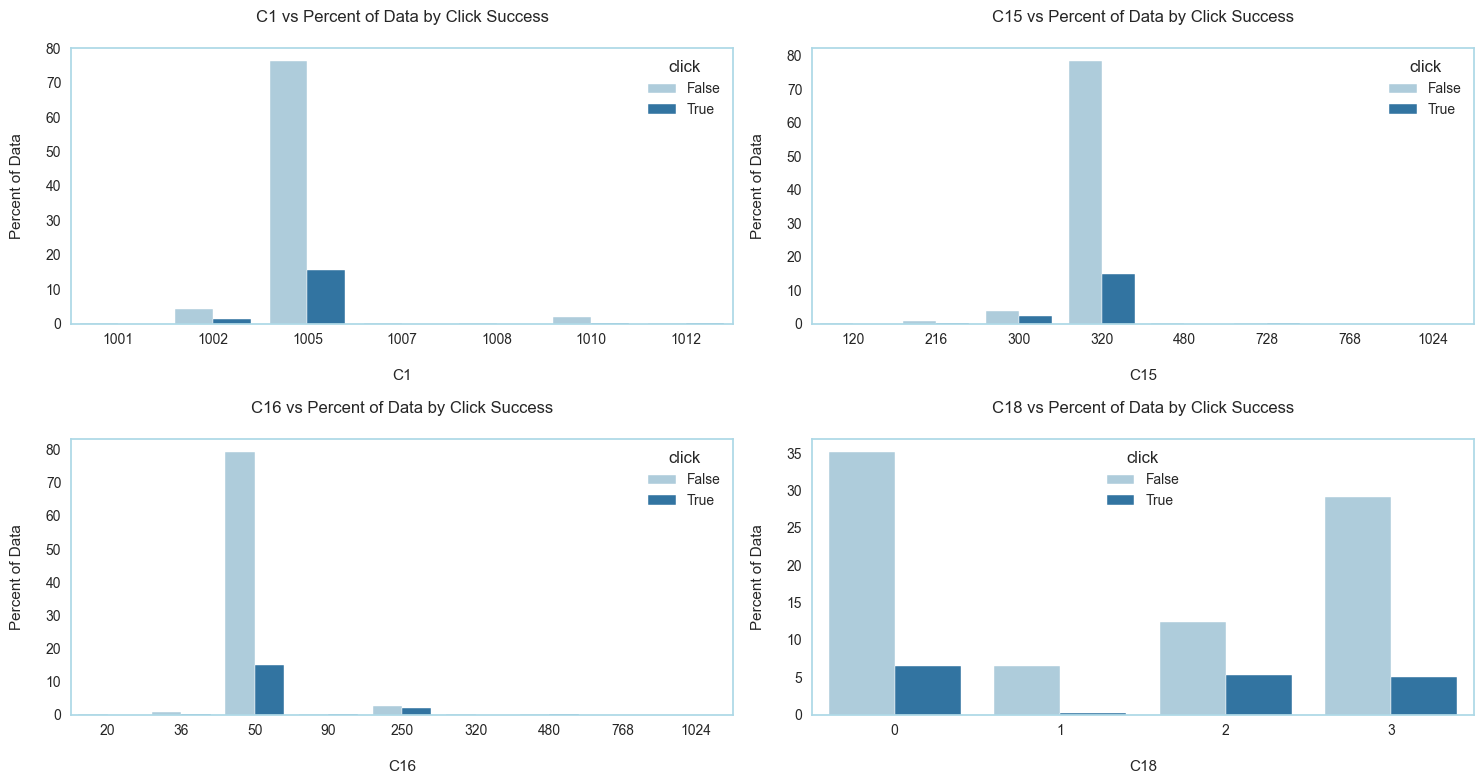

In [71]:
#"C" Columns - C1, C15, C16, C18
fig,axs = plt.subplots(2,2,figsize=(15,8))
counter=16
x = list(col_dict1.keys())[counter]
df_chart = (round(100*crd[[x,"click"]].value_counts(normalize=True),2).reset_index()).sort_values(by=[x,"click"])
res[counter] = sns.barplot(df_chart,x=x,y=0,hue="click",palette="Paired",ax=axs[0,0])
res[counter].set_xlabel("\n"+col_dict1[x][0])
res[counter].set_ylabel("Percent of Data\n")
res[counter].set_title(col_dict1[x][0]+" vs Percent of Data by Click Success\n")
plt.setp(res[counter].xaxis.get_majorticklabels(),fontsize=10)


counter=18
x = list(col_dict1.keys())[counter]
df_chart = (round(100*crd[[x,"click"]].value_counts(normalize=True),2).reset_index()).sort_values(by=[x,"click"])
res[counter] = sns.barplot(df_chart,x=x,y=0,hue="click",palette="Paired",ax=axs[0,1])
res[counter].set_xlabel("\n"+col_dict1[x][0])
res[counter].set_ylabel("Percent of Data\n")
res[counter].set_title(col_dict1[x][0]+" vs Percent of Data by Click Success\n")
sns.move_legend(res[counter],"upper right")

plt.setp(res[counter].xaxis.get_majorticklabels(),fontsize=10)

counter=19
x = list(col_dict1.keys())[counter]
df_chart = (round(100*crd[[x,"click"]].value_counts(normalize=True),2).reset_index()).sort_values(by=[x,"click"])
res[counter] = sns.barplot(df_chart,x=x,y=0,hue="click",palette="Paired",ax=axs[1,0])
res[counter].set_xlabel("\n"+col_dict1[x][0])
res[counter].set_ylabel("Percent of Data\n")
res[counter].set_title(col_dict1[x][0]+" vs Percent of Data by Click Success\n")

plt.setp(res[counter].xaxis.get_majorticklabels(),fontsize=10)

counter=21
x = list(col_dict1.keys())[counter]
df_chart = (round(100*crd[[x,"click"]].value_counts(normalize=True),2).reset_index()).sort_values(by=[x,"click"])
res[counter] = sns.barplot(df_chart,x=x,y=0,hue="click",palette="Paired",ax=axs[1,1])
res[counter].set_xlabel("\n"+col_dict1[x][0])
res[counter].set_ylabel("Percent of Data\n")
res[counter].set_title(col_dict1[x][0]+" vs Percent of Data by Click Success\n")

plt.setp(res[counter].xaxis.get_majorticklabels(),fontsize=10)

plt.tight_layout()
plt.savefig("06 - C Column Analysis.jpeg",dpi=400, bbox_inches='tight')
plt.show()

As mentioned above C18 has bit more spread of data representation compared to C1, C15 and C16

,dayofweek,hour,click_sum,clickcount,clickrate
0,0,0,19,140,0.135714
1,0,1,43,195,0.220513
2,0,2,41,203,0.201970
3,0,3,41,277,0.148014
4,0,4,68,335,0.202985
...,...,...,...,...,...
163,6,19,44,274,0.160584
164,6,20,32,247,0.129555
165,6,21,32,204,0.156863
166,6,22,25,190,0.131579


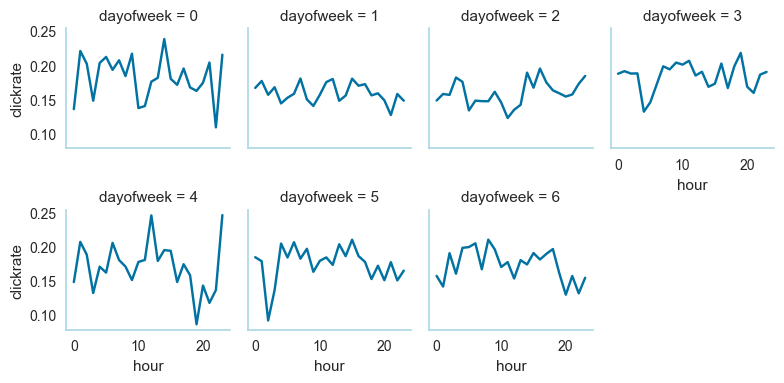

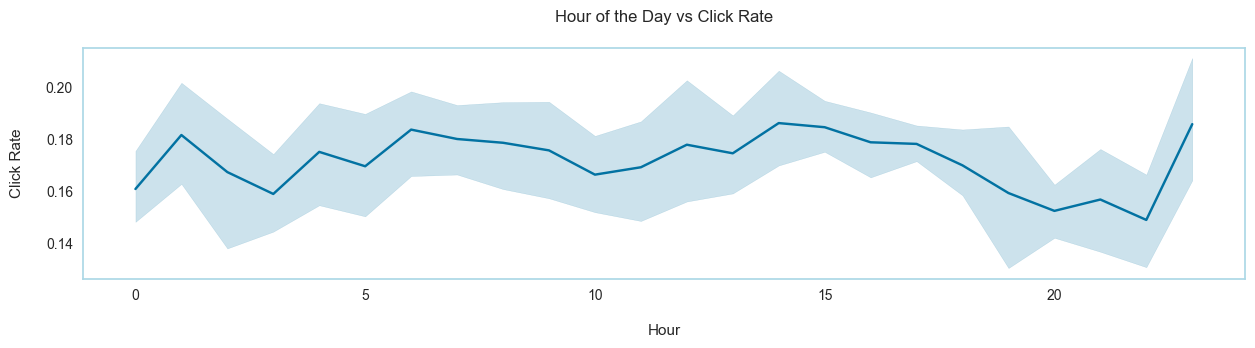

In [72]:
df_chart = crd.groupby(by=["dayofweek","hour"])[["click"]].agg(['sum','count']).reset_index()
df_chart.columns = ["dayofweek","hour","click_sum","clickcount"]
df_chart['clickrate']=df_chart.click_sum/df_chart.clickcount
display(df_chart)

res1 = sns.FacetGrid(df_chart, col="dayofweek", col_wrap=4, height=2)
res1.map(sns.lineplot, "hour", "clickrate")
plt.show()

plt.figure(figsize=(15,3))
res2 = sns.lineplot(data =df_chart, x='hour', y='clickrate')
res2.set_xlabel("\n"+"Hour")
res2.set_ylabel("Click Rate\n")
res2.set_title("Hour of the Day"+" vs Click Rate\n")
plt.show()

## Lets find out if we can handle the data in columns with string data properly

In [73]:
func_stats(crd).sort_values(by="NumOfUniqueValues",ascending=False).head(10)

,Column,Type,NumOfUniqueValues,PercentUnqOfTotal,MostAppearing,MostAppearing%
10,device_ip,object,78013,78.01,6b9769f2,0.521005
9,device_id,object,16801,16.8,a99f214a,82.579826
11,device_model,object,3145,3.15,8a4875bd,6.04106
14,C14,int64,1722,1.72,4687,2.306023
3,site_id,object,1485,1.49,85f751fd,36.02236
6,app_id,object,1354,1.35,ecad2386,63.97764
4,site_domain,object,1331,1.33,c4e18dd6,37.362374
17,C17,int64,399,0.4,1722,10.99111
20,C20,int64,154,0.15,-1,46.767468
7,app_domain,object,96,0.1,7801e8d9,67.464675


In [74]:
crd.drop(columns=["device_ip","month", "click","device_model"], inplace=True)

In [77]:
crd.drop(columns=["C14","C17"],inplace=True)

In [78]:
crd_top5 = pd.DataFrame(columns=["Column","MostAppearingValue","Percentage","Col_Mean","Col_Max","Col_Min","ColRepresentationOfData","Col_UniqueValues"])
for x in crd.columns:
    crd_norm = crd.groupby([x])["y"].agg(["count"]).reset_index()
    crd_norm['count']=100*crd_norm['count'] / crd_norm['count'].sum()
    crd_norm.sort_values(by="count",ascending=False,inplace=True)
    crd_norm["column_mean"] = pd.NA
    crd_norm["column_mean"].fillna(crd_norm['count'].mean(),inplace=True)
    crd_norm["column_max"] = pd.NA
    crd_norm["column_max"].fillna(crd_norm['count'].max(),inplace=True)
    crd_norm["column_min"] = pd.NA
    crd_norm["column_min"].fillna(crd_norm['count'].min(),inplace=True)
    crd_norm["Column"] = pd.NA
    crd_norm["Column"].fillna(x,inplace=True)
    crd_norm["ColRepresentationOfData"] = pd.NA
    crd_norm["ColRepresentationOfData"].fillna(crd_norm.head(7)["count"].sum(),inplace=True)
    crd_norm["Col_UniqueValues"] = pd.NA
    crd_norm["Col_UniqueValues"].fillna(crd[x].unique().size,inplace=True)
    crd_norm.columns = ["MostAppearingValue","Percentage","Col_Mean","Col_Max","Col_Min","Column","ColRepresentationOfData","Col_UniqueValues"]
    crd_norm = crd_norm[["Column","MostAppearingValue","Percentage","Col_Mean","Col_Max","Col_Min","ColRepresentationOfData","Col_UniqueValues"]]

    crd_top5 = crd_top5.append(crd_norm.head(7))

crd_top5

,Column,MostAppearingValue,Percentage,Col_Mean,Col_Max,Col_Min,ColRepresentationOfData,Col_UniqueValues
2,C1,1005,91.862919,14.285714,91.862919,0.00900,100.000000,7
1,C1,1002,5.494055,14.285714,91.862919,0.00900,100.000000,7
5,C1,1010,2.266023,14.285714,91.862919,0.00900,100.000000,7
6,C1,1012,0.254003,14.285714,91.862919,0.00900,100.000000,7
3,C1,1007,0.093001,14.285714,91.862919,0.00900,100.000000,7
...,...,...,...,...,...,...,...,...
10,hour,10,5.345053,4.166667,5.905059,2.00502,38.327383,24
8,hour,8,5.251053,4.166667,5.905059,2.00502,38.327383,24
11,hour,11,5.136051,4.166667,5.905059,2.00502,38.327383,24
0,y,0,83.019830,50.000000,83.019830,16.98017,100.000000,2


In [79]:
crd_top1 = (crd_top5.groupby('Column').nth(0)).reset_index().sort_values(by="ColRepresentationOfData", ascending=False)

crd_top1_A80 = crd_top1[((crd_top1.ColRepresentationOfData >= 60))]
crd_top1_A80_HUNQ_cols = crd_top1_A80[crd_top1_A80.Col_UniqueValues > 18].Column.to_list()
print("crd_top1_A80_HUNQ_cols", crd_top1_A80_HUNQ_cols)

crd_top1_A80_HUNQ = crd_top5[["Column", "MostAppearingValue", "Percentage"]][
    crd_top5.Column.isin(crd_top1_A80_HUNQ_cols)]
display(crd_top1_A80_HUNQ)

crd_top1_A80_HUNQ_cols ['app_category', 'site_category', 'app_domain', 'device_id', 'app_id', 'C20', 'C19', 'site_domain', 'site_id', 'C21']


,Column,MostAppearingValue,Percentage
787,site_id,85f751fd,36.022360
179,site_id,1fbe01fe,15.862159
1287,site_id,e151e245,6.597066
1245,site_id,d9750ee7,2.376024
563,site_id,5b08c53b,2.305023
...,...,...,...
22,C21,79,11.227112
13,C21,48,5.381054
20,C21,71,5.268053
16,C21,61,5.056051


In [80]:
crd2 = crd.copy()

In [81]:
print(dt.datetime.now())
for col in crd_top1_A80_HUNQ_cols:
    print(col,"\n")
    values_not_to_replace = crd_top1_A80_HUNQ["MostAppearingValue"][crd_top1_A80_HUNQ.Column ==col].to_list()

    num_of_rows_to_replace = list(np.round(crd2[col][~crd2.site_category.isin(crd_top1_A80_HUNQ["MostAppearingValue"][crd_top1_A80_HUNQ.Column ==col].to_list())].size*((crd_top1_A80_HUNQ["Percentage"][crd_top1_A80_HUNQ.Column ==col] +((100 - crd_top1_A80_HUNQ["Percentage"][crd_top1_A80_HUNQ.Column ==col].sum())/5)).to_numpy()/100)))

    values_to_replace = crd2[col][~crd2.site_category.isin(crd_top1_A80_HUNQ["MostAppearingValue"][crd_top1_A80_HUNQ.Column ==col].to_list())].to_list()

    for n,v in list(zip(num_of_rows_to_replace,values_not_to_replace)):
        for i,k in list(zip(range(int(n)),(crd2[col][~(crd2[col].isin(values_not_to_replace))]).iloc[:int(n)].index.to_list())):
            crd2[col].loc[k] = v
            #print(i,n,x,crd2["site_category"].loc[k])
print(dt.datetime.now())

2022-11-15 11:36:22.621358
app_category 

site_category 

app_domain 

device_id 

app_id 

C20 

C19 

site_domain 

site_id 

C21 

2022-11-15 11:37:57.575237


In [87]:
print("Total Columns",crd2.columns.size,"\n")
for x in crd2.columns:
    print(x," - ",crd2[x].unique().size,end =" | ")

Total Columns 21 

C1  -  7 | banner_pos  -  7 | site_id  -  7 | site_domain  -  7 | site_category  -  7 | app_id  -  7 | app_domain  -  7 | app_category  -  7 | device_id  -  7 | device_type  -  4 | device_conn_type  -  4 | C15  -  8 | C16  -  9 | C18  -  4 | C19  -  7 | C20  -  7 | C21  -  7 | dayofweek  -  7 | day  -  10 | hour  -  24 | y  -  2 | 

In [97]:
for x in crd_top1_A80_HUNQ_cols:
    crd2[x].replace(to_replace=crd2[x].value_counts().reset_index()["index"].to_list(), value=[0, 1, 2, 3, 4, 5, 6],
                    inplace=True)

## These are lot of categorical predictors.
I will make 2 dfs, one with the C columns and one without them and we will see the difference of these 2 dfs and the impact to modeling for these.

In [98]:
crd_wo_c = crd2.drop(columns=["C1","C15","C16","C18","C19","C20","C21"])

In [99]:
crd_w_c = crd2.copy()

In [100]:
print(crd_wo_c.columns.size)
for x in crd_wo_c.columns:
    print(x," - ",crd_wo_c[x].unique().size,end =" | ")

14
banner_pos  -  7 | site_id  -  7 | site_domain  -  7 | site_category  -  7 | app_id  -  7 | app_domain  -  7 | app_category  -  7 | device_id  -  7 | device_type  -  4 | device_conn_type  -  4 | dayofweek  -  7 | day  -  10 | hour  -  24 | y  -  2 | 

In [101]:
cat_cols = ["banner_pos","site_id","site_domain","site_category","app_id","app_domain","app_category","device_id","device_type","device_conn_type"]
crd_wo_c = pd.get_dummies(crd_wo_c,columns=cat_cols,drop_first=True)
crd_wo_c.columns.size
display(crd_wo_c.head())

,dayofweek,day,hour,y,banner_pos_1,banner_pos_2,banner_pos_3,banner_pos_4,banner_pos_5,banner_pos_7,...,device_id_3,device_id_4,device_id_5,device_id_6,device_type_1,device_type_4,device_type_5,device_conn_type_2,device_conn_type_3,device_conn_type_5
0,1,28,14,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2,22,19,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,3,23,18,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,2,22,19,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,21,8,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [102]:
y = crd_wo_c["y"]
X = crd_wo_c.drop(columns=["y"])
X.shape,y.shape

((99999, 57), (99999,))

In [103]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=42,stratify=y)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((69999, 57), (69999,), (30000, 57), (30000,))

## Multicolinearity check using VIF measure

In [108]:
X_temp = X_train.copy()

In [110]:
def find_vif(df):
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns
    # calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(df.values, i)
                       for i in range(len(df.columns))]
    return vif_data[vif_data.VIF >5].sort_values(by = 'feature', ascending = False)

In [111]:
find_vif(X_temp)

,feature,VIF
14,site_id_6,inf
13,site_id_5,10.760221
11,site_id_3,29.348063
9,site_id_1,inf
20,site_domain_6,inf
19,site_domain_5,10.615132
18,site_domain_4,29.396179
16,site_domain_2,5.667209
15,site_domain_1,inf
23,site_category_3,12.139980


In [123]:
X_temp.drop(columns=['app_category_1',
                     'app_id_1',
                     'app_id_2',
                     'app_id_3',
                     'day',
                     'device_type_1',
                     'site_category_2',
                     'site_domain_2',
                     'site_domain_4',
                     'site_id_1',
                     'site_id_5',
                     'site_id_6'],inplace=True)
find_vif(X_temp).sort_values(by = 'VIF', ascending = False)

,feature,VIF


In [131]:
X_train_bk = X_train.copy()
X_test_bk = X_test.copy()

In [127]:
X_temp.columns.size

45

In [139]:
set(X_train_bk.columns) - set(X_temp.columns)

{'app_category_1',
 'app_id_1',
 'app_id_2',
 'app_id_3',
 'day',
 'device_type_1',
 'site_category_2',
 'site_domain_2',
 'site_domain_4',
 'site_id_1',
 'site_id_5',
 'site_id_6'}

#### Taking backup of X_train and X_test

In [217]:
X_train = X_temp.copy()

In [218]:
X_test = X_test_bk[X_train.columns]

In [219]:
X_train.columns.size,X_test.columns.size,X_train.shape,X_test.shape

(45, 45, (69999, 45), (30000, 45))

# Logistic Regression

## Basic Logistic Regression

In [220]:
lr = LogisticRegression()

lr.fit(X_train, y_train)
temp = lr.predict(X_test)
y_pred_proba = lr.predict_proba(X_test)
print(metrics.accuracy_score(temp, y_test), metrics.roc_auc_score(y_test, y_pred_proba[:, 1]),
      metrics.recall_score(y_test, temp), metrics.f1_score(y_test, temp))

0.8294333333333334 0.663764951348598 0.022575579112681585 0.04301477463998503


In [221]:
np_stats = np.array([["Model Type", "Model Num", "Accuracy", "Recall", "RocAUCScore", "Precision", "F1_Score", "FPR",
                      "TPR", "ConfMatrix"]])
np_stats

array([['Model Type', 'Model Num', 'Accuracy', 'Recall', 'RocAUCScore',
        'Precision', 'F1_Score', 'FPR', 'TPR', 'ConfMatrix']],
      dtype='<U11')

In [222]:
lr = LogisticRegression(penalty="l2", class_weight={0: 2, 1: 8},random_state=42,max_iter=500,n_jobs=3)

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred_proba = lr.predict_proba(X_test)
#print(metrics.accuracy_score(temp,y_test),metrics.roc_auc_score(y_test,y_pred_proba[:,1]),metrics.recall_score(y_test,y_pred),metrics.f1_score(y_test,y_pred))
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
np_temp = np.array([["LogReg", "1", metrics.accuracy_score(y_test, y_pred),
                     metrics.recall_score(y_test, y_pred),
                     metrics.roc_auc_score(y_test, y_pred_proba[:, 1]),
                     metrics.precision_score(y_test, y_pred),
                     metrics.f1_score(y_test, y_pred),
                     lr_fpr,
                     lr_tpr, confusion_matrix(y_test, y_pred)]])
np_stats = np.vstack((np_stats, np_temp))
np_stats

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([['Model Type', 'Model Num', 'Accuracy', 'Recall', 'RocAUCScore',
        'Precision', 'F1_Score', 'FPR', 'TPR', 'ConfMatrix'],
       ['LogReg', '1', 0.7037666666666667, 0.44287396937573614,
        0.6646055284871509, 0.2716435881998796, 0.33674154787670724,
        array([0.00000000e+00, 4.01509676e-05, 8.03019353e-05, ...,
               9.99397735e-01, 9.99397735e-01, 1.00000000e+00])    ,
        array([0.        , 0.        , 0.        , ..., 0.99980369, 1.        ,
               1.        ])                                                    ,
        array([[18857,  6049],
               [ 2838,  2256]])]], dtype=object)

In [223]:
def conf_matrix(y_test, y_predicted,mlabel):
    cm = confusion_matrix(y_test, y_predicted)
    plt.figure(figsize=(8,8))
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.tab20b)
    classNames = ['Negative','Positive']
    plt.title("Confusion Matrix - "+mlabel+"\n")
    plt.ylabel('True label\n')
    plt.xlabel('\nPredicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]

    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),color="white",fontsize=18)
    plt.savefig("Confusion Matrix - "+mlabel,dpi=400, bbox_inches='tight')
    plt.show()

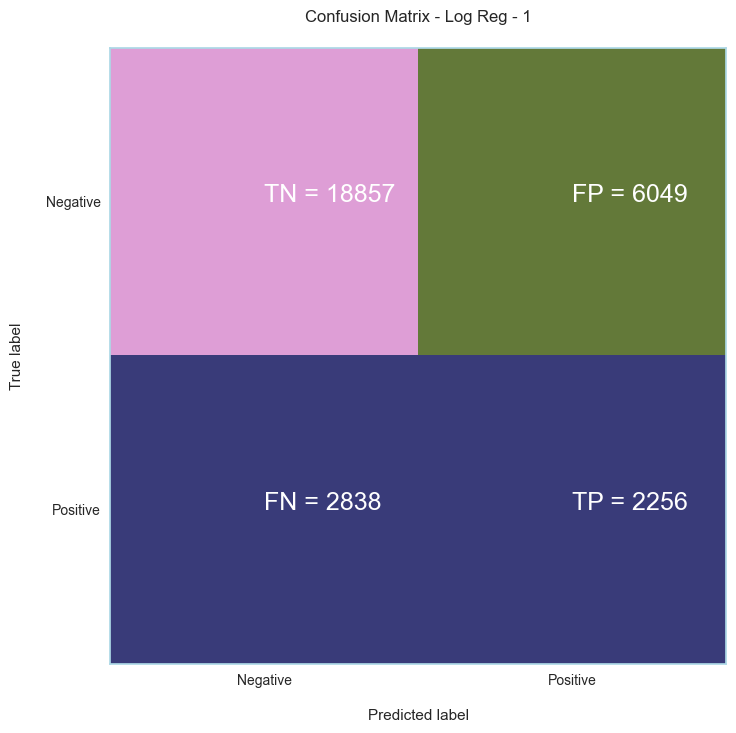

In [224]:
conf_matrix(y_test,y_pred,"Log Reg - 1")

# Feature Selection using RFE

In [225]:
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=20)
X_new = rfe.fit_transform(X_train, y_train)
print(X_new.shape)

# The 10 features selected by RFE

print(rfe.feature_names_in_[rfe.support_])

(69999, 20)
['dayofweek' 'hour' 'banner_pos_1' 'site_id_2' 'site_id_3' 'site_id_4'
 'site_domain_1' 'site_domain_3' 'site_domain_5' 'site_domain_6'
 'site_category_3' 'app_id_4' 'app_domain_2' 'app_domain_4' 'app_domain_6'
 'app_category_3' 'app_category_4' 'device_id_1' 'device_id_2'
 'device_conn_type_2']


In [226]:
# Ranking of features by RFE

from operator import itemgetter
features = X_train.columns.to_list()
for x, y in (sorted(zip(rfe.ranking_ , features), key=itemgetter(0))):
    print(x, y)

1 dayofweek
1 hour
1 banner_pos_1
1 site_id_2
1 site_id_3
1 site_id_4
1 site_domain_1
1 site_domain_3
1 site_domain_5
1 site_domain_6
1 site_category_3
1 app_id_4
1 app_domain_2
1 app_domain_4
1 app_domain_6
1 app_category_3
1 app_category_4
1 device_id_1
1 device_id_2
1 device_conn_type_2
2 device_conn_type_3
3 app_domain_1
4 app_id_5
5 app_category_2
6 site_category_4
7 device_type_5
8 site_category_5
9 app_id_6
10 device_type_4
11 app_domain_3
12 app_category_5
13 app_category_6
14 site_category_6
15 device_conn_type_5
16 app_domain_5
17 site_category_1
18 device_id_3
19 device_id_5
20 device_id_4
21 banner_pos_7
22 banner_pos_3
23 banner_pos_2
24 banner_pos_5
25 banner_pos_4
26 device_id_6


In [227]:
rfe.support_

array([ True,  True,  True, False, False, False, False, False,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
       False, False,  True, False, False, False,  True, False,  True,
       False,  True, False,  True,  True, False, False,  True,  True,
       False, False, False, False, False, False,  True, False, False])

Let's take a copy of X_train and X_test so we can test our models without feature engineering and feature selection

In [228]:
import copy
X_train_without_rfe = copy.deepcopy(X_train)
X_test_without_rfe = copy.deepcopy(X_test)

In [229]:
X_train = pd.DataFrame(X_new, columns = rfe.feature_names_in_[rfe.support_], index = X_train.index)
X_train

,dayofweek,hour,banner_pos_1,site_id_2,site_id_3,site_id_4,site_domain_1,site_domain_3,site_domain_5,site_domain_6,site_category_3,app_id_4,app_domain_2,app_domain_4,app_domain_6,app_category_3,app_category_4,device_id_1,device_id_2,device_conn_type_2
53023,6,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16863,1,3,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0
88091,1,18,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
75881,3,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
61015,2,12,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52141,3,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
37978,1,5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
56957,2,14,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
53013,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [230]:
X_test = pd.DataFrame(X_test, columns = rfe.feature_names_in_[rfe.support_], index = X_test.index)
X_test

,dayofweek,hour,banner_pos_1,site_id_2,site_id_3,site_id_4,site_domain_1,site_domain_3,site_domain_5,site_domain_6,site_category_3,app_id_4,app_domain_2,app_domain_4,app_domain_6,app_category_3,app_category_4,device_id_1,device_id_2,device_conn_type_2
94821,4,22,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
50031,3,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
43776,5,18,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
60357,4,10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
91629,2,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25427,1,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
92027,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
84883,1,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
24943,2,5,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Decision Trees

In [231]:
# Let's create a dummy classifier for baseline accuracy

dummy_classifier = DummyClassifier(strategy='most_frequent')
dummy_classifier.fit(X_train,y_train)
baseline_acc = dummy_classifier.score(X_test,y_test)

print("Baseline Accuracy = ", baseline_acc)

Baseline Accuracy =  0.8302


In [232]:
basic_dec_tree = DecisionTreeClassifier(max_depth=10)
basic_dec_tree.fit(X_train_without_rfe, y_train)
y_basic_dec_tree_pred = basic_dec_tree.predict(X_test_without_rfe)

In [233]:
recall = recall_score(y_test, y_basic_dec_tree_pred, average='weighted')
precision = precision_score(y_test, y_basic_dec_tree_pred, average='weighted')
f1score = metrics.f1_score(y_test, y_basic_dec_tree_pred, average='weighted')
accuracy = accuracy_score(y_test, y_basic_dec_tree_pred)
print('Single Decision Tree Without Feature Selection Performance Metrics')
print('-'*40)
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1 Score: {f1score}')
print(f'Accuracy: {accuracy}')

Single Decision Tree Without Feature Selection Performance Metrics
----------------------------------------
Recall: 0.8302666666666667
Precision: 0.778025917633111
F1 Score: 0.7641898493680258
Accuracy: 0.8302666666666667


In [234]:
basic_dec_tree = DecisionTreeClassifier(max_depth=10)
basic_dec_tree.fit(X_train, y_train)
y_basic_dec_tree_pred = basic_dec_tree.predict(X_test)

In [235]:
print(classification_report(y_test, y_basic_dec_tree_pred))

              precision    recall  f1-score   support

           0       0.83      0.99      0.91     24906
           1       0.50      0.04      0.07      5094

    accuracy                           0.83     30000
   macro avg       0.67      0.51      0.49     30000
weighted avg       0.78      0.83      0.76     30000



In [236]:
recall = recall_score(y_test, y_basic_dec_tree_pred, average='weighted')
precision = precision_score(y_test, y_basic_dec_tree_pred, average='weighted')
f1score = metrics.f1_score(y_test, y_basic_dec_tree_pred, average='weighted')
accuracy = accuracy_score(y_test, y_basic_dec_tree_pred)
print('Single Decision Tree Performance Metrics')
print('-'*40)
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1 Score: {f1score}')
print(f'Accuracy: {accuracy}')

Single Decision Tree Performance Metrics
----------------------------------------
Recall: 0.8302666666666667
Precision: 0.778025917633111
F1 Score: 0.7641898493680258
Accuracy: 0.8302666666666667


Perform Cross Validation

In [237]:
# Performing 10 Fold Cross Validation on our training set
scores = cross_validate(basic_dec_tree, X_train, y_train,  cv = 10, return_train_score=True)
scores = pd.DataFrame(scores)
scores

,fit_time,score_time,test_score,train_score
0,0.110129,0.007329,0.828143,0.834521
1,0.106476,0.003843,0.828571,0.834489
2,0.100327,0.003431,0.830000,0.833505
3,0.098828,0.003588,0.829571,0.834585
4,0.094389,0.003542,0.832571,0.834108
5,0.091274,0.003256,0.829571,0.834489
6,0.094440,0.003520,0.830286,0.834458
7,0.091811,0.003464,0.828857,0.834204
8,0.091815,0.003637,0.828143,0.834886
9,0.091990,0.003177,0.827118,0.834810


In [238]:
print(f'The 10 fold cross validation for basic decision tree has an accuracy of {np.mean(scores.test_score)}')

The 10 fold cross validation for basic decision tree has an accuracy of 0.8292832445451392


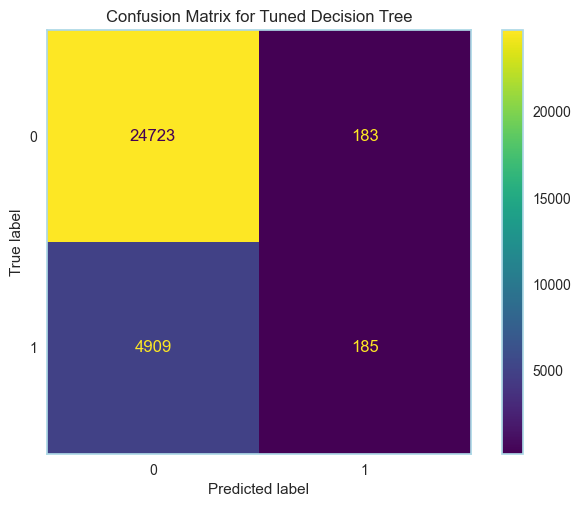

In [239]:
plot_confusion_matrix(basic_dec_tree, X_test, y_test)
plt.title('Confusion Matrix for Tuned Decision Tree')
plt.grid(False)
plt.show()

## Hyperparameter Tuning

In [240]:
param_grid = {
    'max_depth': range(5, 20, 5),
    'min_samples_leaf': range(50, 250, 50),
    'min_samples_split': range(50, 250, 50),
    'criterion': ["entropy", "gini"]
}
n_folds = 5

In [241]:
dtree = DecisionTreeClassifier(class_weight={0:4,1:6})
tree_grid = GridSearchCV(dtree, param_grid, cv=n_folds, n_jobs=-1, scoring="accuracy",return_train_score=True)
tree_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(class_weight={0: 4, 1: 6}),
             n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 20, 5),
                         'min_samples_leaf': range(50, 250, 50),
                         'min_samples_split': range(50, 250, 50)},
             return_train_score=True, scoring='accuracy')

In [242]:
print(f'Best Score For Decision Tree Using GridSerachCV: {tree_grid.best_score_}')

Best Score For Decision Tree Using GridSerachCV: 0.8282403753329319


In [243]:
best_params = tree_grid.best_params_
print(f'Best Hyperparameters For Decision Tree Using GridSerachCV: {best_params}')

Best Hyperparameters For Decision Tree Using GridSerachCV: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 150}


In [244]:
dec_tree = tree_grid.best_estimator_
dec_tree.fit(X_train, y_train)
y_dec_tree_pred = dec_tree.predict(X_test)

In [245]:
print(classification_report(y_test, y_dec_tree_pred))

              precision    recall  f1-score   support

           0       0.84      0.98      0.90     24906
           1       0.46      0.08      0.13      5094

    accuracy                           0.83     30000
   macro avg       0.65      0.53      0.52     30000
weighted avg       0.77      0.83      0.77     30000



In [246]:
recall = recall_score(y_test, y_dec_tree_pred, average='weighted')
precision = precision_score(y_test, y_dec_tree_pred, average='weighted')
f1score = metrics.f1_score(y_test, y_dec_tree_pred, average='weighted')
accuracy = accuracy_score(y_test, y_dec_tree_pred)
print('Decision Tree Optimised Using GridSearchCV  Performance Metrics')
print('-'*65)
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1 Score: {f1score}')
print(f'Accuracy: {accuracy}')

Decision Tree Optimised Using GridSearchCV  Performance Metrics
-----------------------------------------------------------------
Recall: 0.8281333333333334
Precision: 0.7748455960686408
F1 Score: 0.7732435105544522
Accuracy: 0.8281333333333334


In [247]:
# Performing 10 Fold Cross Validation on our training set
scores = cross_validate(dec_tree, X_train, y_train,  cv = 10, return_train_score=True)
scores = pd.DataFrame(scores)
scores

,fit_time,score_time,test_score,train_score
0,0.098802,0.004964,0.826857,0.829029
1,0.082111,0.003981,0.826857,0.828981
2,0.094224,0.004063,0.829000,0.828886
3,0.092122,0.003450,0.829429,0.828886
4,0.087501,0.004301,0.829000,0.828839
5,0.193869,0.005180,0.828000,0.829045
6,0.111535,0.004685,0.831143,0.828966
7,0.346818,0.006235,0.827714,0.829172
8,0.350353,0.031127,0.827857,0.829029
9,0.365322,0.013451,0.825689,0.828952


In [248]:
print(f'The 10 fold cross validation for hyperparameter tuned decision tree has an accuracy of {np.mean(scores.test_score)}')

The 10 fold cross validation for hyperparameter tuned decision tree has an accuracy of 0.8281546527054886


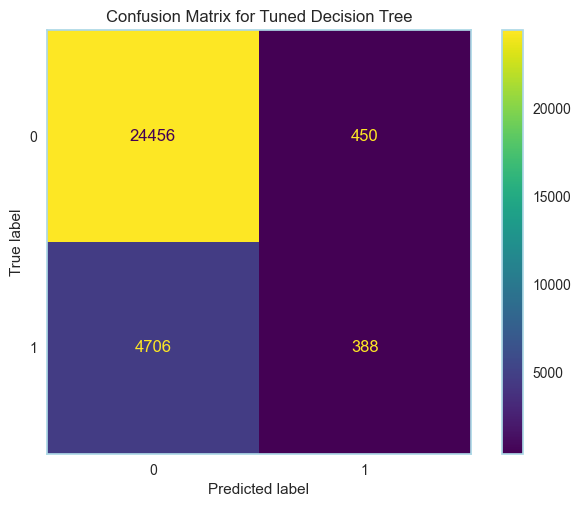

In [249]:
plot_confusion_matrix(dec_tree, X_test, y_test)
plt.title('Confusion Matrix for Tuned Decision Tree')
plt.grid(False)
plt.show()

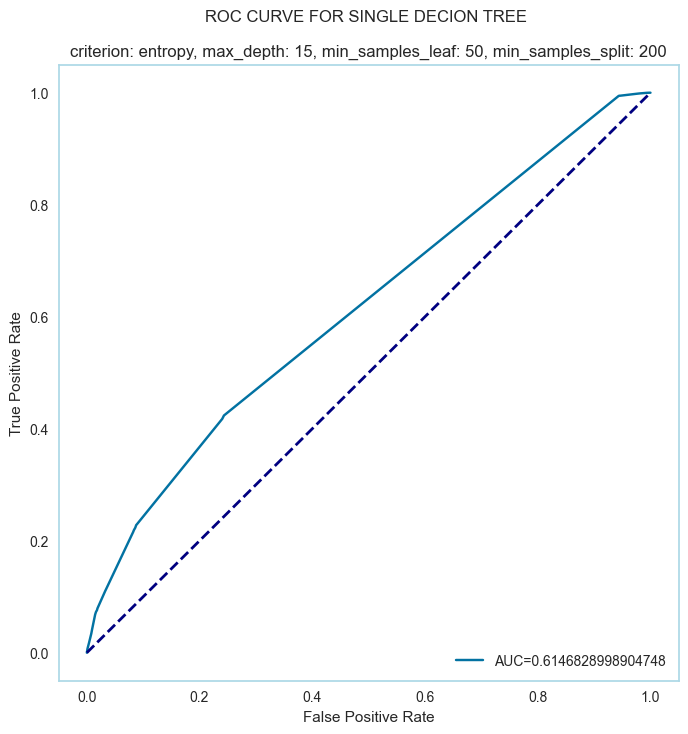

In [250]:
y_pred_proba = dec_tree.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

#creating ROC curve
plt.figure(figsize=[8,8])
plt.title('ROC CURVE FOR SINGLE DECION TREE \n\ncriterion: entropy, max_depth: 15, min_samples_leaf: 50, min_samples_split: 200')
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.legend(loc=4)
plt.show()